# Iteration 4 BDAS (Steps 1 – 8)

## Shiyu Lin
### slin648

In [1]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# Reload local python files every 2 seconds
%load_ext autoreload
%autoreload 2


### 2.3.1 Import the Data

In [3]:
# read in data
sydney = pd.read_csv("SydneyEstateNa.csv", sep=',', header='infer')
# drop the first column
sydney = sydney.drop(sydney.columns[0], axis=1)

# head of data
sydney.head()


,logSalePrice,lotSize,longitude,latitude,saleDate,saleQtr,infRate,postCode,crimeDensity,crimeRate,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
0,14.002571,645.000000,151.081364,-33.881746,23/07/2001,3,0.131753,2135,658.072048,0.329212,...,0.325014,18.983450,0.116958,3.945106,4.778739,5.579980,1.190414,0.516930,0.229914,0.793934
1,13.024223,662.924964,150.952692,-33.865284,26/11/2001,4,0.080510,2165,369.170296,0.207048,...,0.228423,19.087556,0.104246,2.012216,4.711523,7.844125,3.218593,0.982623,0.857011,3.888091
2,13.737006,812.008339,151.288282,-33.769329,21/11/2001,4,0.054411,2096,110.100834,0.129077,...,0.302068,15.840259,0.116958,3.146526,4.523376,8.249469,0.696130,1.451547,0.821424,2.334654
3,12.063030,553.000000,150.815021,-33.732588,01/06/2001,2,0.003506,2770,220.064407,0.206920,...,0.290143,16.855367,0.065339,2.044986,3.058969,20.149325,3.818996,1.297252,0.911597,0.822585
4,14.343142,719.000000,151.204092,-33.816966,25/09/2001,3,0.016782,2065,486.317741,0.188120,...,0.302068,15.840259,0.116958,0.039839,5.096812,3.116945,1.215233,1.361083,0.242207,0.989742


### 2.3.2 Explore and visualize

In [4]:
# overview of data
sydney.describe().astype(int)


,logSalePrice,lotSize,longitude,latitude,saleQtr,infRate,postCode,crimeDensity,crimeRate,income,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
count,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676,...,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676
mean,13,693,151,-33,2,0,2256,390,0,1122,...,0,18,0,3,4,11,2,1,0,2
std,0,175,0,0,1,0,243,485,0,338,...,0,1,0,2,2,9,1,1,0,2
min,11,400,150,-34,1,0,2007,1,0,259,...,0,15,0,0,0,0,0,0,0,0
25%,12,578,150,-33,2,0,2100,90,0,874,...,0,16,0,1,2,5,1,0,0,1
50%,13,664,151,-33,3,0,2161,220,0,1100,...,0,18,0,3,3,9,2,1,0,2
75%,13,760,151,-33,4,0,2230,545,0,1341,...,0,19,0,4,5,15,3,2,1,3
max,16,2000,151,-33,4,0,2770,6102,1,2000,...,0,20,0,17,20,55,17,22,13,22


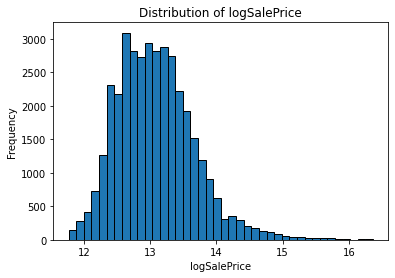

In [5]:
# plot the distribution of the response variable logSalePrice
plt.hist(sydney.logSalePrice, bins=40, edgecolor='black')
plt.title("Distribution of logSalePrice")
plt.xlabel("logSalePrice")
plt.ylabel("Frequency")
plt.show()


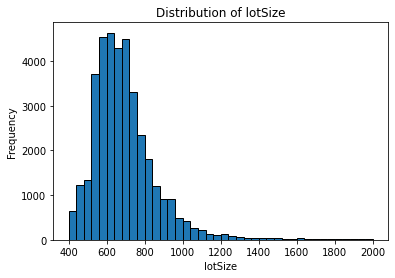

In [6]:
# plot the distribution of lotSize
plt.hist(sydney.lotSize, bins=40, edgecolor='black')
plt.title("Distribution of lotSize")
plt.xlabel("lotSize")
plt.ylabel("Frequency")
plt.show()


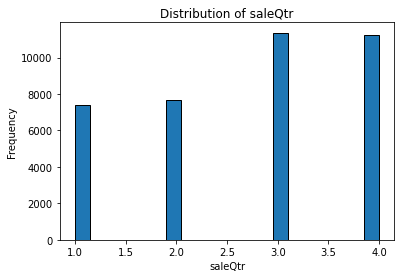

In [7]:
# plot the distribution of saleQtr
plt.hist(sydney.saleQtr, bins=20, edgecolor='black')
plt.title("Distribution of saleQtr")
plt.xlabel("saleQtr")
plt.ylabel("Frequency")
plt.show()


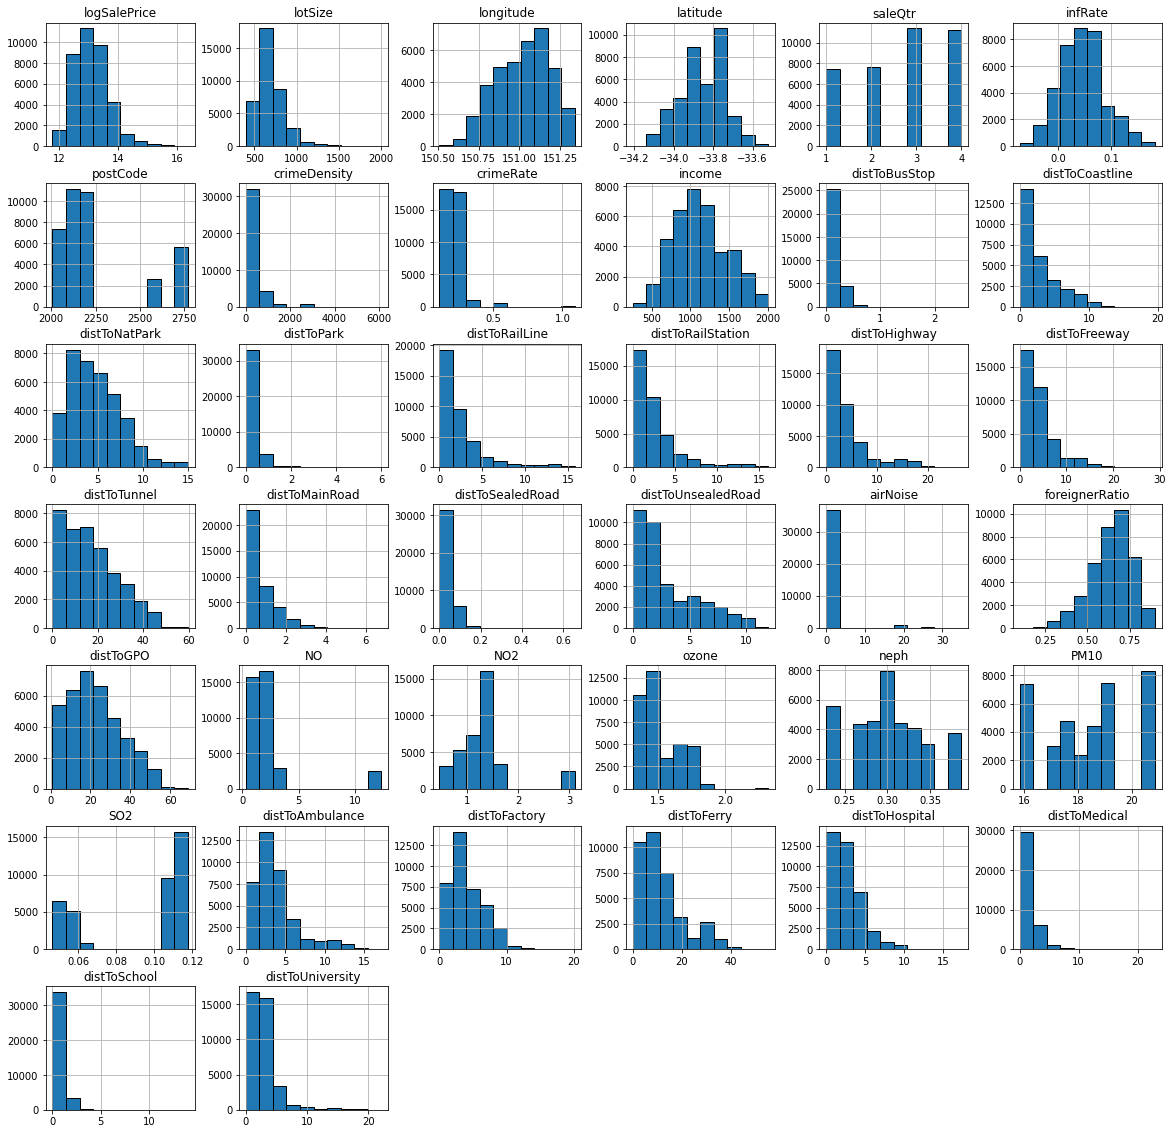

In [8]:
# a plot of all variables
sydney.hist(figsize=(20, 20), edgecolor='black')
plt.show()


### 2.4 Verify the data quality

In [9]:
sydney.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37676 entries, 0 to 37675
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   logSalePrice        37676 non-null  float64
 1   lotSize             37676 non-null  float64
 2   longitude           37676 non-null  float64
 3   latitude            37676 non-null  float64
 4   saleDate            37676 non-null  object 
 5   saleQtr             37676 non-null  int64  
 6   infRate             37676 non-null  float64
 7   postCode            37676 non-null  int64  
 8   crimeDensity        37676 non-null  float64
 9   crimeRate           37676 non-null  float64
 10  income              37676 non-null  int64  
 11  distToBusStop       30169 non-null  float64
 12  distToCoastline     27885 non-null  float64
 13  distToNatPark       37676 non-null  float64
 14  distToPark          37676 non-null  float64
 15  distToRailLine      37676 non-null  float64
 16  dist

In [10]:
# check for missing values
sydney.isnull().sum()


logSalePrice             0
lotSize                  0
longitude                0
latitude                 0
saleDate                 0
saleQtr                  0
infRate                  0
postCode                 0
crimeDensity             0
crimeRate                0
income                   0
distToBusStop         7507
distToCoastline       9791
distToNatPark            0
distToPark               0
distToRailLine           0
distToRailStation        0
distToHighway            0
distToFreeway            0
distToTunnel             0
distToMainRoad           0
distToSealedRoad         0
distToUnsealedRoad       0
airNoise                 0
foreignerRatio           0
distToGPO                0
NO                       0
NO2                      0
ozone                    0
neph                     0
PM10                     0
SO2                      0
distToAmbulance          0
distToFactory            0
distToFerry              0
distToHospital           0
distToMedical            0
d

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92a0e6d750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92a0e6dcf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92a0e6d480>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92a0e6e290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92a0e6e560>],
 'means': []}

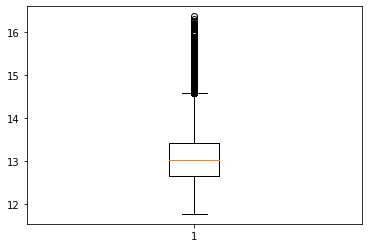

In [11]:
# plot outliers in logSalePrice
plt.boxplot(sydney.logSalePrice)


### 3.1 Select the data

In [12]:
# dimensions of data
sydney.shape


(37676, 39)

In [13]:
# drop saleDate and postCode from sydney data
sydney = sydney.drop(['saleDate', 'postCode'], axis=1)

# dimensions of data now
sydney.shape


(37676, 37)

### 3.2 Clean the data

In [14]:
# Using IterativeImputer in sklearn to handle the missing values, with initial_strategy='median'.
imputer = IterativeImputer(
    missing_values=np.nan, max_iter=12, initial_strategy='median', random_state=1234)

# Fit to data, then transform it.
imputer.fit(sydney)
sydney_imp = imputer.transform(sydney)

# convert to dataframe
sydney_imp = pd.DataFrame(sydney_imp, columns=sydney.columns)
# check for missing values
sydney_imp.isnull().sum()


logSalePrice          0
lotSize               0
longitude             0
latitude              0
saleQtr               0
infRate               0
crimeDensity          0
crimeRate             0
income                0
distToBusStop         0
distToCoastline       0
distToNatPark         0
distToPark            0
distToRailLine        0
distToRailStation     0
distToHighway         0
distToFreeway         0
distToTunnel          0
distToMainRoad        0
distToSealedRoad      0
distToUnsealedRoad    0
airNoise              0
foreignerRatio        0
distToGPO             0
NO                    0
NO2                   0
ozone                 0
neph                  0
PM10                  0
SO2                   0
distToAmbulance       0
distToFactory         0
distToFerry           0
distToHospital        0
distToMedical         0
distToSchool          0
distToUniversity      0
dtype: int64

In [15]:
# remove outliers: 3 standard deviations from the mean
for col in sydney_imp.columns:
    sydney_imp = sydney_imp[np.abs(
        sydney_imp[col]-sydney_imp[col].mean()) <= (3*sydney_imp[col].std())]

# dimensions of data now
sydney_imp.shape


(24754, 37)

### 3.3 Construct the data

In [16]:
# add new column SalePrice
# SalePrice = exp(logSalePrice)/1000
sydney_imp['SalePrice'] = np.exp(sydney_imp['logSalePrice'])/1000
sydney_imp['SalePrice'].head(10)


0     1205.699868
3      173.343432
6      173.343432
7      439.778707
8      313.302200
9      436.568643
10     526.450422
12     972.007238
15     975.859314
16    1990.239398
Name: SalePrice, dtype: float64

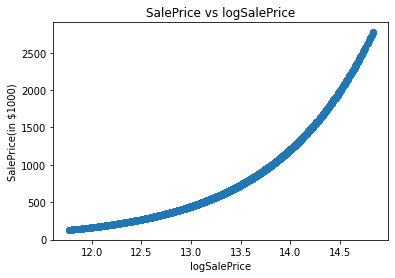

In [17]:
# plot SalePrice vs logSalePrice
plt.scatter(sydney_imp['logSalePrice'], sydney_imp['SalePrice'])
plt.title("SalePrice vs logSalePrice")
plt.xlabel("logSalePrice")
plt.ylabel("SalePrice(in $1000)")
plt.show()


### 3.4 Integrate various data sources

In [18]:
# import 2 new datasets
sydpart1 = pd.read_csv("SydneyEstateNa1.csv", sep=',', header='infer')
sydpart2 = pd.read_csv("SydneyEstateNa2.csv", sep=',', header='infer')

# merge 2 datasets
sydney_merged = pd.concat([sydpart1, sydpart2], axis=0)

# drop the first column
sydney_merged = sydney_merged.drop(sydney_merged.columns[0], axis=1)

# overview of sydney_merged
sydney_merged.describe().astype(int)


,logSalePrice,lotSize,longitude,latitude,saleQtr,infRate,postCode,crimeDensity,crimeRate,income,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
count,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676,...,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676
mean,13,693,151,-33,2,0,2256,390,0,1122,...,0,18,0,3,4,11,2,1,0,2
std,0,175,0,0,1,0,243,485,0,338,...,0,1,0,2,2,9,1,1,0,2
min,11,400,150,-34,1,0,2007,1,0,259,...,0,15,0,0,0,0,0,0,0,0
25%,12,578,150,-33,2,0,2100,90,0,874,...,0,16,0,1,2,5,1,0,0,1
50%,13,664,151,-33,3,0,2161,220,0,1100,...,0,18,0,3,3,9,2,1,0,2
75%,13,760,151,-33,4,0,2230,545,0,1341,...,0,19,0,4,5,15,3,2,1,3
max,16,2000,151,-33,4,0,2770,6102,1,2000,...,0,20,0,17,20,55,17,22,13,22


### 3.5 Format the data as required

In [19]:
# saleQtr as categorical variable
sydney_imp['saleQtr'] = sydney_imp['saleQtr'].astype('category')
# check
sydney_imp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24754 entries, 0 to 37675
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   logSalePrice        24754 non-null  float64 
 1   lotSize             24754 non-null  float64 
 2   longitude           24754 non-null  float64 
 3   latitude            24754 non-null  float64 
 4   saleQtr             24754 non-null  category
 5   infRate             24754 non-null  float64 
 6   crimeDensity        24754 non-null  float64 
 7   crimeRate           24754 non-null  float64 
 8   income              24754 non-null  float64 
 9   distToBusStop       24754 non-null  float64 
 10  distToCoastline     24754 non-null  float64 
 11  distToNatPark       24754 non-null  float64 
 12  distToPark          24754 non-null  float64 
 13  distToRailLine      24754 non-null  float64 
 14  distToRailStation   24754 non-null  float64 
 15  distToHighway       24754 non-null  

In [20]:
# split explanatory and response variables
X = sydney_imp.drop(['logSalePrice', 'SalePrice'], axis=1)
log_y = sydney_imp['logSalePrice']
y = sydney_imp['SalePrice']


In [21]:
X.head()


,lotSize,longitude,latitude,saleQtr,infRate,crimeDensity,crimeRate,income,distToBusStop,distToCoastline,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
0,645.000000,151.081364,-33.881746,3.0,0.131753,658.072048,0.329212,1564.0,0.153313,2.142680,...,0.325014,18.983450,0.116958,3.945106,4.778739,5.579980,1.190414,0.516930,0.229914,0.793934
3,553.000000,150.815021,-33.732588,2.0,0.003506,220.064407,0.206920,804.0,0.047612,14.127644,...,0.290143,16.855367,0.065339,2.044986,3.058969,20.149325,3.818996,1.297252,0.911597,0.822585
6,575.000000,150.803617,-33.754383,4.0,0.082403,220.064407,0.206920,504.0,0.122905,13.337931,...,0.290143,16.855367,0.104246,1.319172,1.649167,20.183875,2.672311,1.214924,0.630336,0.623362
7,700.262571,151.042088,-33.804476,3.0,0.035158,589.112798,0.251134,823.0,0.056877,1.443709,...,0.228423,19.087556,0.116958,5.208205,2.356500,3.097816,1.512533,1.845819,0.464874,1.620972
8,721.000000,151.035486,-33.865321,4.0,0.023668,573.368191,0.333071,804.0,0.128562,3.420364,...,0.325014,18.983450,0.116958,1.682641,7.225857,6.221853,0.595347,1.058978,0.280087,1.750704


In [22]:
log_y.head()


0    14.002571
3    12.063030
6    12.063030
7    12.994027
8    12.654924
Name: logSalePrice, dtype: float64

In [23]:
y.head()


0    1205.699868
3     173.343432
6     173.343432
7     439.778707
8     313.302200
Name: SalePrice, dtype: float64

### 4.1 Reduce the data

In [24]:
# select the best 10 features
F_select = SelectKBest(score_func=f_regression, k=10)
X_select = F_select.fit_transform(X, log_y)

index_list = F_select.get_support()
index_select = []
for i in range(X.shape[1]):
    if index_list[i] == 1:
        index_select.append(i)

index_select


[0, 1, 6, 7, 9, 10, 16, 19, 22, 31]

In [25]:
# importances of features
scores = F_select.scores_
colnames = X.columns
importances = pd.DataFrame({'feature': colnames, 'importance': scores})
importances = importances.sort_values('importance', ascending=False)
importances.head(10)


,feature,importance
1,longitude,26257.906256
22,distToGPO,19041.788523
16,distToTunnel,15378.514025
9,distToCoastline,11632.170593
7,income,8988.726618
31,distToFerry,8821.533225
19,distToUnsealedRoad,8376.951349
10,distToNatPark,7297.084450
0,lotSize,4661.292072
6,crimeRate,3711.113391


In [26]:
# convert to dataframe
df_X_select = pd.DataFrame(X_select)
# change column names
df_X_select.columns = X.columns[index_select]
# check
df_X_select.head()


,lotSize,longitude,crimeRate,income,distToCoastline,distToNatPark,distToTunnel,distToUnsealedRoad,distToGPO,distToFerry
0,645.000000,151.081364,0.329212,1564.0,2.142680,6.923308,7.500839,7.862015,11.823826,5.579980
1,553.000000,150.815021,0.206920,804.0,14.127644,7.685946,32.114024,1.915779,39.345297,20.149325
2,575.000000,150.803617,0.206920,504.0,13.337931,9.082003,34.199691,0.750949,39.472682,20.183875
3,700.262571,151.042088,0.251134,823.0,1.443709,4.243691,16.213310,3.859965,16.924224,3.097816
4,721.000000,151.035486,0.333071,804.0,3.420364,6.876696,11.710323,3.744639,15.968499,6.221853


### 4.2 Project the data

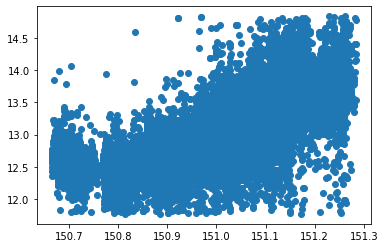

In [27]:
# plot longitude vs logSalePrice
plt.scatter(df_X_select['longitude'], log_y)


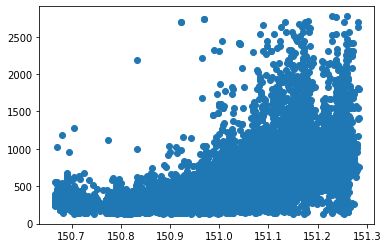

In [28]:
# plot longitude vs SalePrice
plt.scatter(df_X_select['longitude'], y)


### 6.3 Build/Select appropriate model(s) and choose relevant parameter(s)

### 7.2 Conduct data mining

In [29]:
# Univariate Linear Regression
# using pyspark
# Must be included at the beginning of each new notebook. Remember to change the app name.
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
import pyspark
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
spark = SparkSession.builder.appName('linear_reg').getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/13 21:14:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [30]:
# combine explanatory and response variables
df = df_X_select
df['logSalePrice'] = log_y
df['SalePrice'] = y
# check
df.head()


,lotSize,longitude,crimeRate,income,distToCoastline,distToNatPark,distToTunnel,distToUnsealedRoad,distToGPO,distToFerry,logSalePrice,SalePrice
0,645.000000,151.081364,0.329212,1564.0,2.142680,6.923308,7.500839,7.862015,11.823826,5.579980,14.002571,1205.699868
1,553.000000,150.815021,0.206920,804.0,14.127644,7.685946,32.114024,1.915779,39.345297,20.149325,NaN,NaN
2,575.000000,150.803617,0.206920,504.0,13.337931,9.082003,34.199691,0.750949,39.472682,20.183875,NaN,NaN
3,700.262571,151.042088,0.251134,823.0,1.443709,4.243691,16.213310,3.859965,16.924224,3.097816,12.063030,173.343432
4,721.000000,151.035486,0.333071,804.0,3.420364,6.876696,11.710323,3.744639,15.968499,6.221853,NaN,NaN


In [31]:
# convert to spark dataframe
df_spark = spark.createDataFrame(df)
# check
df_spark.printSchema()

root
 |-- lotSize: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- crimeRate: double (nullable = true)
 |-- income: double (nullable = true)
 |-- distToCoastline: double (nullable = true)
 |-- distToNatPark: double (nullable = true)
 |-- distToTunnel: double (nullable = true)
 |-- distToUnsealedRoad: double (nullable = true)
 |-- distToGPO: double (nullable = true)
 |-- distToFerry: double (nullable = true)
 |-- logSalePrice: double (nullable = true)
 |-- SalePrice: double (nullable = true)



In [32]:
# Univariate Linear Regression
# only 'longitude' as explanatory variable
data = df_spark.select("longitude", 'logSalePrice')
# remove NA values
data = data.na.drop()
data.show()


22/10/13 21:14:57 WARN TaskSetManager: Stage 0 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


+----------+------------+
| longitude|logSalePrice|
+----------+------------+
|151.081364| 14.00257076|
|151.042088| 12.06303006|
|151.081312| 12.06303006|
|151.099618| 12.99402694|
|151.211359|  12.6549235|
|151.095329|  12.9867009|
|151.007302| 13.17391244|
|150.770307| 13.78711853|
|151.113055| 13.79107371|
|151.100714| 14.50376549|
|150.712185| 13.36231304|
|150.877943| 12.51904744|
|150.979174|  12.6792162|
|151.081463| 13.33154138|
|151.040266| 12.25150548|
|151.030426| 13.25582956|
|150.707008| 13.19323671|
|151.137569| 13.19800999|
|150.981428| 12.50486281|
|151.117718| 12.36176197|
+----------+------------+
only showing top 20 rows



In [33]:
assembler = VectorAssembler(
    inputCols=["longitude"],
    outputCol="longitude_")

output = assembler.transform(data)

# split data into training and testing sets
train_data, test_data = output.randomSplit([0.7, 0.3])
train_data.describe().show()


22/10/13 21:15:00 WARN TaskSetManager: Stage 1 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


+-------+------------------+------------------+
|summary|         longitude|      logSalePrice|
+-------+------------------+------------------+
|  count|             11403|             11403|
|   mean|  151.012634767342| 13.02613341732353|
| stddev|0.1357371236523024|0.5065218833542972|
|    min|        150.665959|       11.76791301|
|    max|        151.282455|       14.82163254|
+-------+------------------+------------------+



In [34]:
# do the regression
lr1 = LinearRegression(featuresCol='longitude_', labelCol='logSalePrice')
lrModel1 = lr1.fit(train_data)

22/10/13 21:15:02 WARN Instrumentation: [def44a35] regParam is zero, which might cause numerical instability and overfitting.
22/10/13 21:15:03 WARN TaskSetManager: Stage 4 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/13 21:15:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/10/13 21:15:03 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
22/10/13 21:15:04 WARN TaskSetManager: Stage 5 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


In [35]:
# test results
test_results1 = lrModel1.evaluate(test_data)
# print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(
    lrModel1.coefficients, lrModel1.intercept))


22/10/13 21:15:05 WARN TaskSetManager: Stage 6 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


Coefficients: [0.04396839597736949] Intercept: 6.386350094287161


In [36]:
# print the RMSE
print("RMSE: {}".format(test_results1.rootMeanSquaredError))
# print the R2
print("R2: {}".format(test_results1.r2))


RMSE: 0.49939533832776417
R2: -0.00033751382643520955


In [37]:
# store the results in a dataframe
results = pd.DataFrame({"Model": ["Univariate Linear Regression"],
                    'RMSE': [test_results1.rootMeanSquaredError],
                    'R2': [test_results1.r2]})

In [38]:
# Multivariate Linear Regression
# all explanatory variables except SalePrice
data = df_spark.select(df_spark.columns[0:11])
# remove NA values
data = data.na.drop()
data.show()


+-----------+----------+-----------+------+------------------+-------------+------------+------------------+-----------+-----------+------------+
|    lotSize| longitude|  crimeRate|income|   distToCoastline|distToNatPark|distToTunnel|distToUnsealedRoad|  distToGPO|distToFerry|logSalePrice|
+-----------+----------+-----------+------+------------------+-------------+------------+------------------+-----------+-----------+------------+
|      645.0|151.081364|0.329211579|1564.0|       2.142679997|  6.923308139| 7.500839131|       7.862014708|  11.823826|5.579979736| 14.00257076|
|700.2625707|151.042088| 0.25113383| 823.0|       1.443709268|  4.243691371| 16.21330965|        3.85996549|16.92422389|3.097816483| 12.06303006|
|579.0057919|151.081312| 0.14095137|1016.0|       3.529289219|  4.792174592| 4.456347609|       7.699100559|13.73797112| 10.7151134| 12.06303006|
|795.5046069|151.099618|0.132836382|1104.0|       0.791807534|   4.79256718| 9.207712008|       1.587379309|19.15863597|6.45

22/10/13 21:15:07 WARN TaskSetManager: Stage 7 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


In [39]:
assembler = VectorAssembler(
    inputCols=["lotSize", "longitude", "crimeRate", "income",
               "distToCoastline", "distToNatPark", "distToTunnel",
               "distToUnsealedRoad", "distToGPO", "distToFerry"],
    outputCol="explavar")

output = assembler.transform(data)

# split data into training and testing sets
train_data, test_data = output.randomSplit([0.7, 0.3])


In [40]:
# do the regression
lr2 = LinearRegression(featuresCol='explavar', labelCol='logSalePrice')
lrModel2 = lr2.fit(train_data)

22/10/13 21:15:08 WARN Instrumentation: [65169c25] regParam is zero, which might cause numerical instability and overfitting.
22/10/13 21:15:08 WARN TaskSetManager: Stage 8 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:09 WARN TaskSetManager: Stage 9 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


In [41]:
# test results
test_results2 = lrModel2.evaluate(test_data)
# print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(
    lrModel2.coefficients, lrModel2.intercept))

22/10/13 21:15:10 WARN TaskSetManager: Stage 10 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


Coefficients: [-3.0090953661789273e-05,0.1558538167151835,-0.04231737544460251,3.332195510842669e-05,-0.00022103839570271957,0.0032403195190090885,0.001909872834547866,0.003250079892909144,0.0006095454298880409,-0.0002499741176398287] Intercept: -10.585968859198386


In [42]:
# print the RMSE
print("RMSE: {}".format(test_results2.rootMeanSquaredError))
# print the R2
print("R2: {}".format(test_results2.r2))

RMSE: 0.5107643224880004
R2: -0.0008392259726517359


In [43]:
# store the results in a dataframe
results = results.append({"Model": "Multivariate Linear Regression",
                          'RMSE': test_results2.rootMeanSquaredError,
                          'R2': test_results2.r2}, ignore_index=True)


/tmp/ipykernel_4990/2613983238.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": "Multivariate Linear Regression",


In [44]:
# random forest
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator


In [45]:

# split data into training and testing sets
train_data, test_data = output.randomSplit([0.7, 0.3])


In [46]:

# do the regression
rf = RandomForestRegressor(featuresCol='explavar', labelCol='logSalePrice')
rfModel = rf.fit(train_data)

# test results
predictions = rfModel.transform(test_data)
predictions.select("prediction", "logSalePrice").show(10)

# evaluate the model
evaluator1 = RegressionEvaluator(
    labelCol="logSalePrice", predictionCol="prediction", metricName="rmse")
rmse = evaluator1.evaluate(predictions)
evaluator2 = RegressionEvaluator(
    labelCol="logSalePrice", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)

# print both RMSE and R2
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("R Squared (R2) on test data = %g" % r2)


22/10/13 21:15:12 WARN TaskSetManager: Stage 11 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:13 WARN TaskSetManager: Stage 12 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:14 WARN TaskSetManager: Stage 13 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:15 WARN TaskSetManager: Stage 15 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:16 WARN TaskSetManager: Stage 17 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:17 WARN TaskSetManager: Stage 19 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:17 WARN TaskSetManager: Stage 21 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/

+------------------+------------+
|        prediction|logSalePrice|
+------------------+------------+
|13.107838673150217| 13.05765263|
|13.078877084694629| 13.05765263|
|13.126786391854797| 13.45854107|
|13.039297052454225| 12.99256602|
|13.123270370596098|  12.6383942|
|13.032137287422131| 12.13448902|
|13.068077634329217| 13.13664104|
|13.051651840736065| 13.03549106|
|13.044887867579266| 13.07799232|
| 13.09478047631211| 13.80154501|
+------------------+------------+
only showing top 10 rows



22/10/13 21:15:19 WARN TaskSetManager: Stage 26 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.
22/10/13 21:15:20 WARN TaskSetManager: Stage 27 contains a task of very large size (1336 KiB). The maximum recommended task size is 1000 KiB.


Root Mean Squared Error (RMSE) on test data = 0.499342
R Squared (R2) on test data = -0.000696758


In [47]:
# store the results in a dataframe
results = results.append({"Model": "Random Forest",
                          'RMSE': rmse,
                          'R2': r2}, ignore_index=True)

/tmp/ipykernel_4990/500925500.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": "Random Forest",


### 7.3 Search for patterns

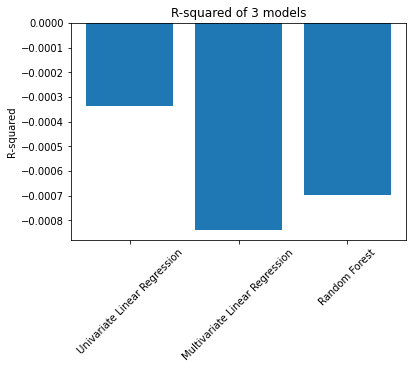

In [48]:
# plot the results: R-squared
plt.bar(results['Model'], results['R2'])
plt.title('R-squared of 3 models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()


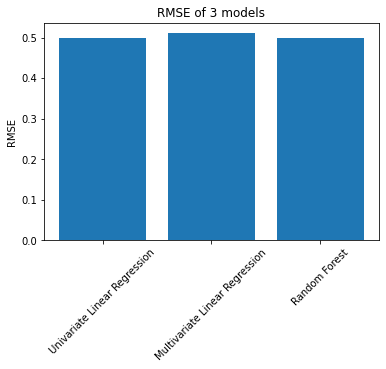

In [49]:
# plot the results: RMSE
plt.bar(results['Model'], results['RMSE'])
plt.title('RMSE of 3 models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [50]:
# terminate the spark session
spark.stop()
